In [10]:
import pandas as pd

# Load the CSV file into a Pandas dataframe
df = pd.read_csv('expenses.csv')
# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
# Convert the amount column to a float
df['amount'] = df['amount'].astype(float)

# Drop any rows with missing values
df = df.dropna()

# Remove any leading/trailing whitespace from category names
df['category'] = df['category'].str.strip()

# Group expenses by category and calculate the total for each category
category_totals = df.groupby('category')['amount'].sum()

# Print the category totals
print(category_totals)


category
Bills                           740.0
Clothing                        235.0
Electricity and water bills     100.0
Entertainment                    59.5
Fee                             210.0
Food                            482.9
Gifts                            50.0
Grocery                         275.0
Health                          100.0
House Rent                     2000.0
Miscallenous                     75.0
Personal care                    25.0
Transportation                  750.0
Travel                          650.0
Name: amount, dtype: float64


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Load the CSV file into a Pandas dataframe
df = pd.read_csv('expenses.csv')

# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Convert the amount column to a float
df['amount'] = df['amount'].astype(float)

# Drop any rows with missing values
df = df.dropna()

# Remove any leading/trailing whitespace from category names
df['category'] = df['category'].str.strip()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['description'], df['category'], random_state=42)

# Vectorize the textual descriptions using a TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train an SVM classifier on the training data
clf = LinearSVC()
clf.fit(X_train_counts, y_train)

# Predict the categories for the test data
y_pred = clf.predict(X_test_counts)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6923076923076923


In [12]:
import pandas as pd
import json
import spacy

# Load the pre-trained English language model in spaCy
nlp = spacy.load('en_core_web_sm')

# Define an Expense class with fields for date, description, amount, and category
class Expense:
    def __init__(self, date, description, amount, category):
        self.date = date
        self.description = description
        self.amount = amount
        self.category = category

# Load the expense data from a CSV file into a Pandas dataframe
df = pd.read_csv('expenses.csv')

# Convert the dataframe to a list of Expense objects
expenses = [Expense(pd.to_datetime(row['date'], format='%d-%m-%Y').strftime('%Y-%m-%d'), row['description'], row['amount'], '') for _, row in df.iterrows()]

# Define a function to extract category information from expense descriptions
def extract_category(description: str) -> str:
    # Create a spaCy Doc object from the expense description
    doc = nlp(description.lower())

    # Extract the noun chunks from the Doc object
    noun_chunks = list(doc.noun_chunks)

    # Look for keywords in the noun chunks to determine the category
    if any(['coffee' in nc.text for nc in noun_chunks]):
        return 'Coffee'
    elif any(['groceries' in nc.text for nc in noun_chunks]):
        return 'Groceries'
    elif any(['dinner' in nc.text for nc in noun_chunks]):
        return 'Dining'
    elif any(['lunch' in nc.text for nc in noun_chunks]):
        return 'Dining'
    elif any(['gas' in nc.text for nc in noun_chunks]):
        return 'Gas'
    elif any(['movie tickets' in nc.text for nc in noun_chunks]):
        return 'Entertainment'
    elif any(['hotel stay' in nc.text for nc in noun_chunks]):
        return 'Lodging'
    elif any(['clothing' in nc.text for nc in noun_chunks]):
        return 'Apparel'
    elif any(['bill' in nc.text for nc in noun_chunks]):
        return 'Bills'
    elif any(['fee' in nc.text for nc in noun_chunks]):
        return 'Fees'
    elif any(['rent' in nc.text for nc in noun_chunks]):
        return 'Rent'
    elif any(['grocery' in nc.text for nc in noun_chunks]):
        return 'Grocery'
    else:
        return 'Other'

# Extract category information from the expense descriptions
for expense in expenses:
    expense.category = extract_category(expense.description)

# Convert the list of Expense objects to a list of dictionaries
expense_dicts = [{'date': e.date, 'description': e.description, 'amount': e.amount, 'category': e.category} for e in expenses]

# Convert the list of dictionaries to a JSON string
json_str = json.dumps(expense_dicts)

# Convert the JSON string back to a Pandas dataframe
df = pd.read_json(json_str)

# Print the updated dataframe
print(df)


         date                    description  amount   category
0  2022-12-01                      Groceries   100.0  Groceries
1  2022-12-03                       Gasoline    45.0        Gas
2  2022-12-04                   Movie ticket    12.5      Other
3  2022-12-05               Electricity bill    80.0      Bills
4  2022-12-06            Dinner with friends    60.0     Dining
5  2022-12-08                        Haircut    25.0      Other
6  2022-12-10                  Internet bill    70.0      Bills
7  2022-12-12                 Christmas gift    50.0      Other
8  2022-12-13                Car maintenance   150.0      Other
9  2022-12-15                  Lunch at work    10.0     Dining
10 2023-01-02                      Groceries    45.3  Groceries
11 2023-01-04                       Gasoline    35.0        Gas
12 2023-01-06           Dinner at Restaurant    78.0     Dining
13 2023-01-08               Electricity bill   100.0      Bills
14 2023-01-10                   Movie ti

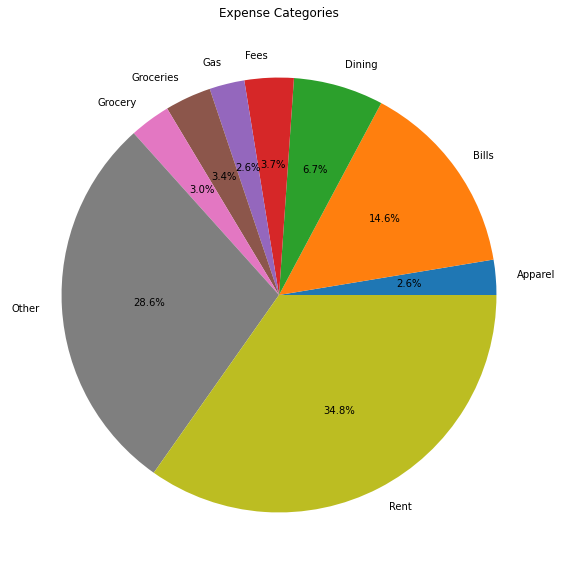

In [13]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt

# Define an Expense class with fields for date, description, amount, and category
class Expense:
    def __init__(self, date, description, amount, category):
        self.date = date
        self.description = description
        self.amount = amount
        self.category = category
# Load the pre-trained English language model in spaCy
nlp = spacy.load('en_core_web_sm')
# Load the expense data from a CSV file into a Pandas dataframe
df = pd.read_csv('expenses.csv')

# Convert the dataframe to a list of Expense objects
expenses = [Expense(row['date'], row['description'], row['amount'], '') for _, row in df.iterrows()]

# Define a function to extract category information from expense descriptions
def extract_category(description: str) -> str:
    # Create a spaCy Doc object from the expense description
    doc = nlp(description.lower())

    # Extract the noun chunks from the Doc object
    noun_chunks = list(doc.noun_chunks)

    # Look for keywords in the noun chunks to determine the category
    if any(['coffee' in nc.text for nc in noun_chunks]):
        return 'Coffee'
    elif any(['groceries' in nc.text for nc in noun_chunks]):
        return 'Groceries'
    elif any(['dinner' in nc.text for nc in noun_chunks]):
        return 'Dining'
    elif any(['lunch' in nc.text for nc in noun_chunks]):
        return 'Dining'
    elif any(['gas' in nc.text for nc in noun_chunks]):
        return 'Gas'
    elif any(['movie tickets' in nc.text for nc in noun_chunks]):
        return 'Entertainment'
    elif any(['hotel stay' in nc.text for nc in noun_chunks]):
        return 'Lodging'
    elif any(['clothing' in nc.text for nc in noun_chunks]):
        return 'Apparel'
    elif any(['bill' in nc.text for nc in noun_chunks]):
        return 'Bills'
    elif any(['fee' in nc.text for nc in noun_chunks]):
        return 'Fees'
    elif any(['rent' in nc.text for nc in noun_chunks]):
        return 'Rent'
    elif any(['grocery' in nc.text for nc in noun_chunks]):
        return 'Grocery'
    else:
        return 'Other'



# Extract category information from the expense descriptions
for expense in expenses:
    expense.category = extract_category(expense.description)

# Convert the list of Expense objects to a Pandas dataframe
df = pd.DataFrame.from_records([e.__dict__ for e in expenses])

# Group the expenses by category and sum the amounts for each category
grouped = df.groupby('category').agg({'amount': 'sum'})

# Create a pie chart showing the distribution of expenses by category
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(grouped['amount'], labels=grouped.index, autopct='%1.1f%%')
ax.set_title('Expense Categories')

# Show the pie chart
plt.show()


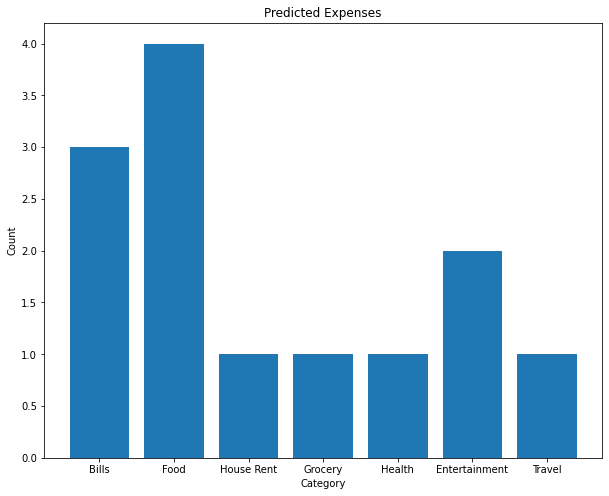

In [14]:
import matplotlib.pyplot as plt

# Create a dictionary to store the count of each predicted category
pred_counts = {}
for category in y_pred:
    if category in pred_counts:
        pred_counts[category] += 1
    else:
        pred_counts[category] = 1

# Create a bar plot showing the count of each predicted category
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(pred_counts.keys(), pred_counts.values())
ax.set_title('Predicted Expenses')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.show()


In [15]:
import pandas as pd

# read in the expenses DataFrame
expenses_df = pd.read_csv("expenses.csv")

# convert the date column to a pandas datetime object
expenses_df["date"] = pd.to_datetime(expenses_df["date"], format="%d-%m-%Y")


# read in the monthly income DataFrame
monthly_df = pd.read_csv("monthly_income.csv")

# add a new column to the expenses DataFrame for the month
expenses_df["month"] = expenses_df["date"].dt.month

# group the expenses DataFrame by month and category, and sum the amounts
expenses_grouped = expenses_df.groupby(["month", "category"])["amount"].sum().reset_index()

# pivot the expenses DataFrame to get the categories as columns
expenses_pivot = expenses_grouped.pivot(index="month", columns="category", values="amount").reset_index()

# merge the expenses and monthly income DataFrames on the month column
result_df = pd.merge(monthly_df, expenses_pivot, on="month", how="outer")

# fill any missing values with 0
result_df.fillna(0, inplace=True)

# add a new column for the total expenses for each month
result_df["expense"] = result_df.drop("month", axis=1).sum(axis=1)

# reorder the columns
result_df = result_df[["month", "expense", "income"]]

# save the result DataFrame to a new CSV file
result_df.to_csv("monthly_income_and_expenses.csv", index=False)


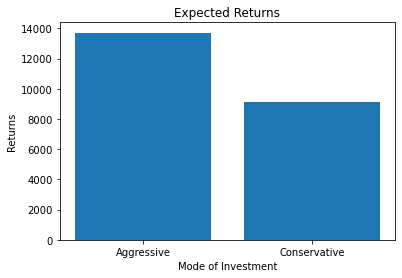

The mode of investment that maximizes returns is: Conservative
The expected returns for the year are: 9139.808


In [17]:
#To visualize the expected returns, we can add a bar chart using the matplotlib library. Here's the modified code:

import pandas as pd
import matplotlib.pyplot as plt

#Load data from CSV file
data = pd.read_csv('monthly_income_and_expenses.csv')

#Define the expected returns for each mode of investment
aggressive_returns = 0.12
conservative_returns = 0.08

#Calculate net income (income - expense) for each month
data['Net Income'] = data['income'] - data['expense']

#Calculate the percentage of net income relative to income for each month
data['Net Income %'] = (data['Net Income'] / data['income']) * 100

#Calculate the rolling sum of net income percentage for each month
data['Cumulative Net Income %'] = data['Net Income %'].cumsum()

#Find the index of the month with the highest cumulative net income percentage
max_index = data['Cumulative Net Income %'].idxmax()

#Determine the mode of investment that maximizes returns
if max_index < 6: # First half of the year
    mode_of_investment = 'Aggressive'
    expected_returns = aggressive_returns
else: # Second half of the year
    mode_of_investment = 'Conservative'
    expected_returns = conservative_returns

#Calculate the total expected returns for the year
total_returns = data['Net Income'].sum() * expected_returns

#Plot a bar chart of the expected returns
plt.bar(['Aggressive', 'Conservative'], [data['Net Income'].sum() * aggressive_returns, data['Net Income'].sum() * conservative_returns])
plt.title('Expected Returns')
plt.xlabel('Mode of Investment')
plt.ylabel('Returns')
plt.show()

print("The mode of investment that maximizes returns is:", mode_of_investment)
print("The expected returns for the year are:", total_returns)




